# Lista 08 - Comparando Regressões

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Linear Regularizada para **pelo menos um** dos conjuntos de dados disponível na [seção de regressão linear múltipla](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html) da página do *Livro Understandable Statistics* de Charles Brase e Corrinne Brase. Para o conjunto de dados que escolheu, execute a regressão linear múltipla para explicar o fator $X1$ dos dados ([ver descrição de um dos conjuntos](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)) a partir dos outros fatores. 

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Diferente da lista anterior, reporte o erro quadrado médio no conjunto de teste.

# Dados de Saúde
A base de dados escolhida foi a de dados de Saúde 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge


df = pd.read_excel("data.xls")
FEATURES=["X2","X3","X4","X5"]
TARGET = ["X1"]
#normalizando os dados
df[FEATURES]-=df[FEATURES].mean()
df[FEATURES]/=df[FEATURES].std(ddof=1)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5
0,8.0,-1.005483,-0.919349,-0.312289,-0.034793
1,9.3,-1.269429,-0.471389,-0.684230,0.707051
2,7.5,-1.216640,0.448585,-2.079006,0.049989
3,8.9,-0.530381,3.614376,-0.498260,-0.289139
4,10.2,-1.111061,-0.339105,-1.056170,2.021175


## KNN
Aqui, variamos a quantidade de vizinhos que iremos considerar no modelo

In [2]:
splits = 5
skf = KFold(n_splits=splits)
X_train, X_test, y_train, y_test = train_test_split(df[FEATURES], df[TARGET], test_size=0.2, random_state=23)

In [3]:

fold = 0
melhores = []
results = []
for nn in range(1,11): 
    best = (0, 0)
    accuracy=0
    for treino, validacao in skf.split(X_train, y_train):
        X_tt = X_train.iloc[treino]
        y_tt = y_train.iloc[treino]
        X_v = X_train.iloc[validacao]
        y_v = y_train.iloc[validacao]

        model = KNeighborsRegressor(n_neighbors=nn)
        model.fit(X_tt, y_tt) 
        y_pv = model.predict(X_v) 

        accuracy += mean_squared_error(y_v, y_pv)
    accuracy/=splits
    results.append([accuracy,nn])
    if accuracy > best[0]:
        best = (accuracy, nn)

    melhores.append(best[1])
    fold += 1
    print('N-{}, acc = {}'.format(fold, best[0]))

N-1, acc = 4.007833519981786
N-2, acc = 3.2010141016809164
N-3, acc = 3.1029291807113673
N-4, acc = 2.982675515549685
N-5, acc = 2.7120079835267363
N-6, acc = 2.622294932719353
N-7, acc = 2.386023984467831
N-8, acc = 2.3677189225849498
N-9, acc = 2.5063870092759872
N-10, acc = 2.585869895746761


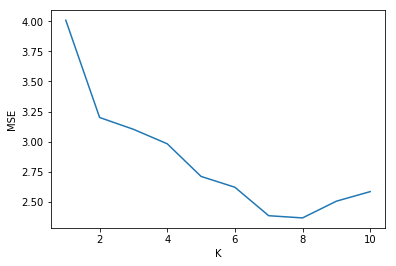

In [4]:
res = pd.DataFrame(results,columns=["MSE","K"])
plt.plot(res["K"],res["MSE"])
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

Como pudemos observar, N = 8 nos dá o menor MSE. Logo, iremos criar um novelo modelo com K=8.

In [5]:

model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train, y_train) 
y_pv = model.predict(X_test)

print(mean_squared_error( y_pv,y_test))


4.812031265463989


## Regressão Linear Regularizada
Aqui, variamos o alpha da regressao linear regularizada

In [6]:
splits = 5
skf = KFold(n_splits=splits)
X_train, X_test, y_train, y_test = train_test_split(df[FEATURES], df[TARGET], test_size=0.2, random_state=23)

In [7]:


fold = 0
melhores = []
results = []
for alpha in range(1,11): 
    best = (0, 0)
    accuracy=0
    for treino, validacao in skf.split(X_train, y_train):
        X_tt = X_train.iloc[treino]
        y_tt = y_train.iloc[treino]
        X_v = X_train.iloc[validacao]
        y_v = y_train.iloc[validacao]
        clf = Ridge(alpha=alpha * 0.1)
        model.fit(X_tt, y_tt) 
        y_pv = model.predict(X_v) 

        accuracy += mean_squared_error(y_v, y_pv)
    accuracy/=splits
    results.append([accuracy,alpha])
    if accuracy > best[0]:
        best = (accuracy, nn)

    melhores.append(best[1])
    fold += 1
    print('Aplha {}, acc = {}'.format(fold, best[0]))
    

Aplha 1, acc = 2.3677189225849498
Aplha 2, acc = 2.3677189225849498
Aplha 3, acc = 2.3677189225849498
Aplha 4, acc = 2.3677189225849498
Aplha 5, acc = 2.3677189225849498
Aplha 6, acc = 2.3677189225849498
Aplha 7, acc = 2.3677189225849498
Aplha 8, acc = 2.3677189225849498
Aplha 9, acc = 2.3677189225849498
Aplha 10, acc = 2.3677189225849498


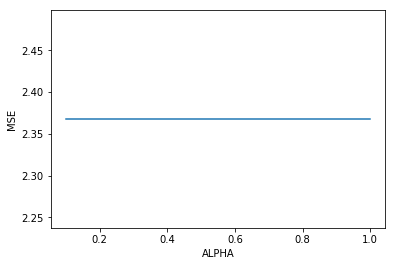

In [8]:

res = pd.DataFrame(results,columns=["MSE","ALPHA"])
plt.plot(res["ALPHA"]*0.1,res["MSE"])
plt.xlabel("ALPHA")
plt.ylabel("MSE")
plt.show()

In [9]:
model = Ridge(alpha=5)
model.fit(X_train, y_train) 
y_pv = model.predict(X_test)

print(mean_squared_error( y_pv,y_test))

3.619568201227736


Explique e discuta sobre os resultados encontrados no campo abaixo.

A regressão linear tem menores valores de erro, tanto para validação quanto para teste, em comparação à regressão utilizando KNN. Este resultado pode ser explicado pelo fato de que, com poucos dados (visto o tamanho reduzido dos datasets), a regressão linear pode obter uma aproximação mais fidedigna, ao passo que o KNN depende dos vizinhos, que pode causar ruído. Vale ressaltar que, para manter a reprodutibilidade dos experimentos, não foi adicionada a flag shuffle na separação treino/teste, o que causou a regressão linear apresentar o mesmo MSE para todos os valores de alpha